In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [2]:
df_data = pd.read_excel('boston_house_data.xlsx', index_col=0)
df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
df_target = pd.read_excel('boston_house_target.xlsx', index_col=0)
df_target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [4]:
mean_price = df_target[0].mean()

df_target['Label'] = df_target[0].apply(lambda x: 1 if x > mean_price else 0 )
df_target.head()

,0,Label
0,24.0,1
1,21.6,0
2,34.7,1
3,33.4,1
4,36.2,1


In [5]:
boston_data = np.array(df_data)
boston_target = np.array(df_target['Label'])

In [6]:
boston_X = boston_data[:,(5, 12)] # 주택당 방 수 & 인구 중 하위 계층 비율 
boston_X

array([[6.575, 4.98 ],
       [6.421, 9.14 ],
       [7.185, 4.03 ],
       ...,
       [6.976, 5.64 ],
       [6.794, 6.48 ],
       [6.03 , 7.88 ]])

In [7]:
boston_Y = boston_target

In [8]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, boston_Y, test_size=0.3, random_state=0)

In [9]:
model = linear_model.LogisticRegression()

In [10]:
model.fit(x_train, y_train)

LogisticRegression()

In [11]:
pred_test = model.predict_proba(x_test)
pred_test

array([[2.71727138e-01, 7.28272862e-01],
       [5.14126251e-01, 4.85873749e-01],
       [5.72011266e-01, 4.27988734e-01],
       [9.94933971e-01, 5.06602928e-03],
       [7.70744299e-01, 2.29255701e-01],
       [5.07806637e-01, 4.92193363e-01],
       [7.68191608e-01, 2.31808392e-01],
       [5.56571586e-01, 4.43428414e-01],
       [9.37812032e-01, 6.21879678e-02],
       [5.76735788e-01, 4.23264212e-01],
       [9.93110093e-01, 6.88990666e-03],
       [9.88530491e-01, 1.14695093e-02],
       [9.66734148e-01, 3.32658524e-02],
       [9.99931971e-01, 6.80287144e-05],
       [7.73411904e-03, 9.92265881e-01],
       [5.49287966e-02, 9.45071203e-01],
       [6.30280147e-01, 3.69719853e-01],
       [3.26213034e-02, 9.67378697e-01],
       [1.13247007e-01, 8.86752993e-01],
       [5.34701631e-01, 4.65298369e-01],
       [2.41228758e-01, 7.58771242e-01],
       [8.12700869e-01, 1.87299131e-01],
       [8.86759215e-01, 1.13240785e-01],
       [2.29468197e-01, 7.70531803e-01],
       [7.158449

In [14]:
print('Accuracy: ', accuracy_score(model.predict(x_test), y_test))

Accuracy:  0.8223684210526315


In [16]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1])
roc_auc = auc(fpr, tpr) 

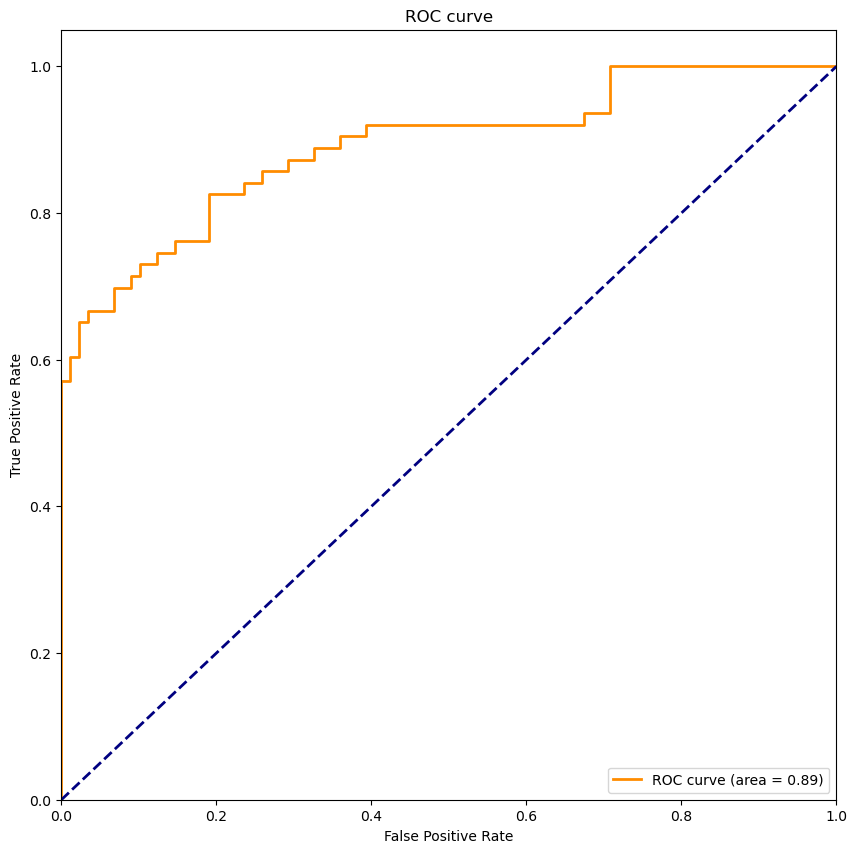

In [17]:
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

/Users/lanoon/anaconda3/envs/AI_NLP/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


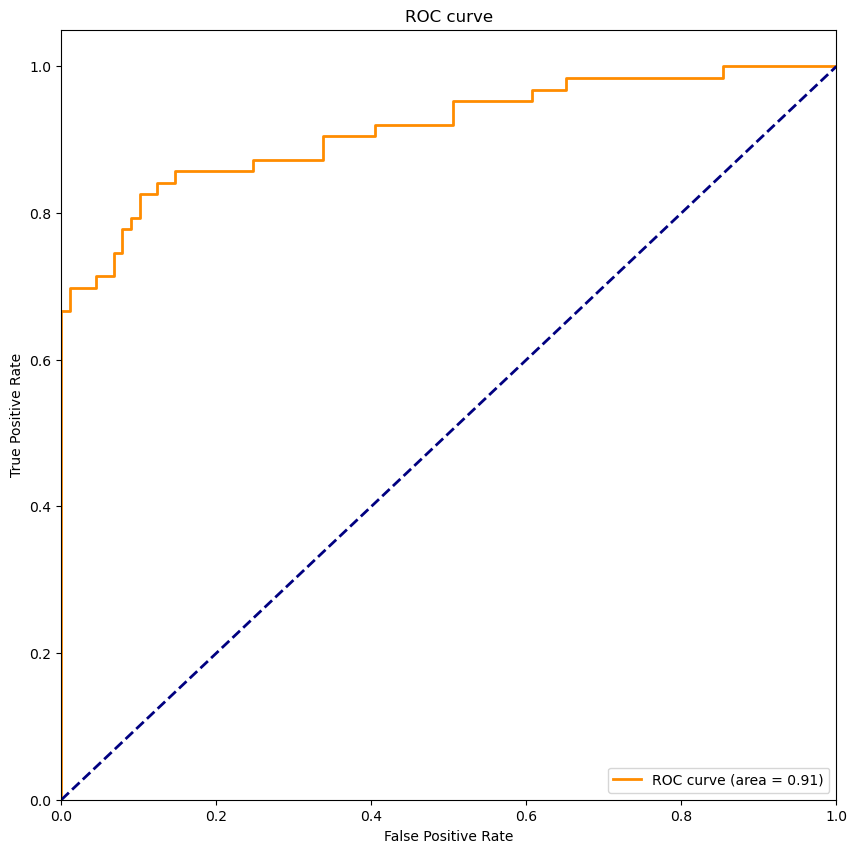

In [20]:
df_data = pd.read_excel('boston_house_data.xlsx', index_col=0)
df_target = pd.read_excel('boston_house_target.xlsx')
df_target['Label'] = df_target[0].apply(lambda x: 1 if x > df_target[0].mean() else 0 ) 
boston_data = np.array(df_data)
boston_target = np.array(df_target['Label'])

boston_X = boston_data[:,5:13]
boston_Y = boston_target

x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, boston_Y, test_size=0.3, random_state=0)

model = linear_model.LogisticRegression()

model.fit(x_train, y_train)


#print('Accuracy: ', accuracy_score(model.predict(x_test), y_test))

pred_test = model.predict_proba(x_test) 
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) 
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()